In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np


In [5]:
tdata=pd.read_csv("ToyotaCorolla.csv", encoding='unicode_escape')

In [6]:
tdata.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
tdata.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
tdata.shape

(1436, 38)

# EDA

In [9]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [10]:
tdata1=tdata[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [11]:
tdata1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [19]:
#Rename the columns to handle easy of each variable
tdata1.rename(columns={'Age_08_04':'AgeA4', 'Quarterly_Tax':'qat', 'cc':'CC'}, inplace=True)

In [20]:
tdata1.head()

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [21]:
tdata1.isnull().sum()

Price     0
AgeA4     0
KM        0
HP        0
CC        0
Doors     0
Gears     0
qat       0
Weight    0
dtype: int64

In [24]:
tdata1[tdata1.duplicated()]

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [26]:
tdata2=tdata1.drop_duplicates().reset_index(drop=True)
tdata2

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [29]:
tdata2.describe()

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correaltin and Visualisation

In [27]:
tdata2.corr()

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AgeA4,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qat,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


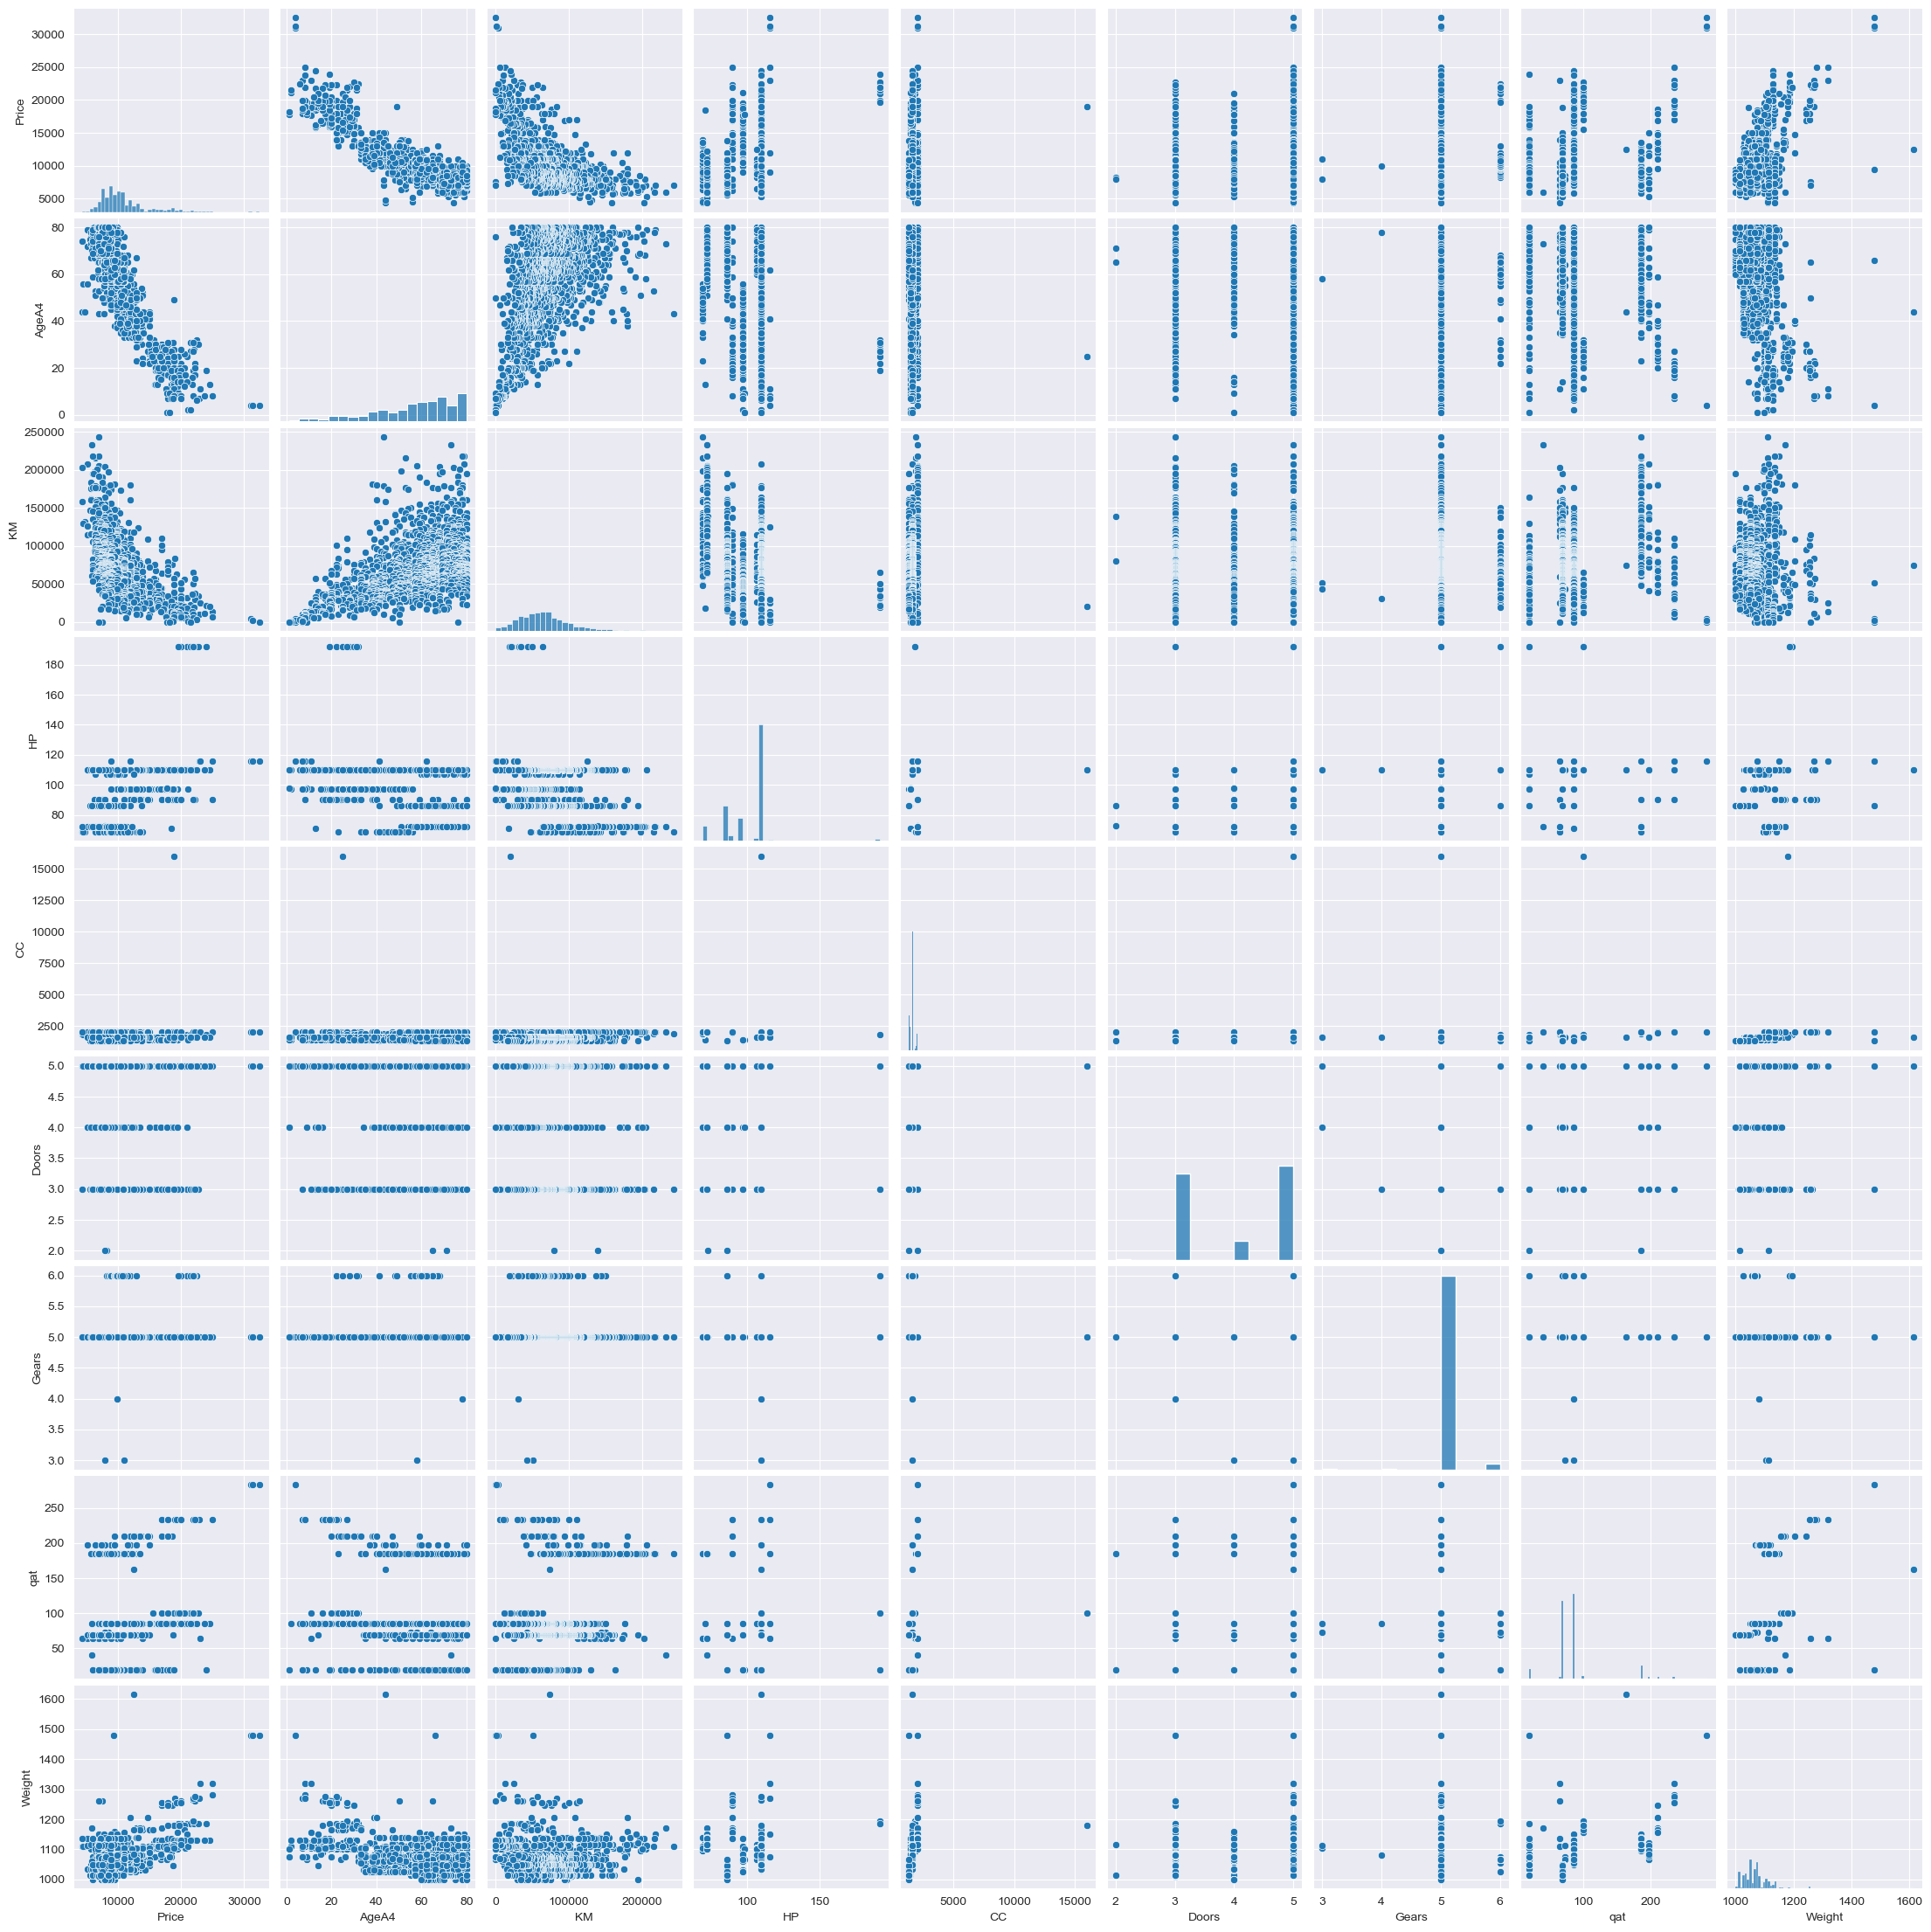

In [30]:
sns.set_style(style='darkgrid')
sns.pairplot(tdata2)

# Model building

In [33]:
tdata2.head(1)

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
0,13500,23,46986,90,2000,3,5,210,1165


In [107]:
import statsmodels.formula.api as smf
Model=smf.ols("Price~AgeA4+KM+HP+CC+Doors+qat+Weight+Gears", data=tdata2).fit()

In [108]:
Model

# Model Testing

In [109]:
Model.params

Intercept   -5472.540368
AgeA4        -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
qat             3.858805
Weight         16.855470
Gears         597.715894
dtype: float64

In [110]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:42:10   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AgeA4       -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
qat            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
Model.tvalues, 'pvalues:', Model.pvalues

(Intercept    -3.875273
 AgeA4       -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 qat           2.944198
 Weight       15.760663
 Gears         3.034563
 dtype: float64,
 'pvalues:',
 Intercept     1.113392e-04
 AgeA4        1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 qat           3.290363e-03
 Weight        1.031118e-51
 Gears         2.452430e-03
 dtype: float64)

In [112]:
#Build Slr and Mlr models to Insignificant varibales 
#and their pvalues and tvalues

slr_c = smf.ols("Price~CC", data=tdata2).fit()
slr_c


In [113]:
slr_c.pvalues, slr_c.tvalues

(Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64,
 Intercept    24.879592
 CC            4.745039
 dtype: float64)

In [114]:
slr_d=smf.ols("Price~Doors", data=tdata2).fit()

In [115]:
slr_d.pvalues, slr_d.tvalues

(Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64,
 Intercept    19.421546
 Doors         7.070520
 dtype: float64)

In [116]:
slr_cd = smf.ols("Price~CC+Doors", data=tdata2).fit()

In [117]:
slr_cd.tvalues, slr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques

# 1.Collinearity Check

In [118]:
#collinearity 
#vif=1/(1-rsquared)
rsq_age = smf.ols("AgeA4~CC+Doors+Weight+KM+HP+qat+Gears", data=tdata2).fit().rsquared
vif_age=1/(1-rsq_age)
vif_age

1.8762358497682892

In [119]:
rsq_D = smf.ols("Doors~AgeA4+CC+Weight+KM+HP+qat+Gears", data=tdata2).fit().rsquared
vif_D=1/(1-rsq_D)
vif_D

1.155889865814207

In [120]:
rsq_C = smf.ols("CC~Doors+AgeA4+Weight+KM+HP+qat+Gears", data=tdata2).fit().rsquared
vif_C=1/(1-rsq_C)
vif_C

1.163470364594085

In [121]:
rsq_K = smf.ols("KM~AgeA4+Doors+Weight+CC+HP+qat+Gears", data=tdata2).fit().rsquared
vif_K=1/(1-rsq_K)
vif_K

1.7571780239810393

In [122]:
rsq_H = smf.ols("HP~AgeA4+Doors+Weight+CC+KM+qat+Gears", data=tdata2).fit().rsquared
vif_H=1/(1-rsq_H)
vif_H

1.4191801087182139

In [123]:
rsq_Q = smf.ols("qat~AgeA4+Doors+Weight+CC+KM+HP+Gears", data=tdata2).fit().rsquared
vif_Q=1/(1-rsq_Q)
vif_Q

2.2953745089857147

In [124]:
rsq_G = smf.ols("Gears~AgeA4+Doors+Weight+CC+KM+HP+qat", data=tdata2).fit().rsquared
vif_G=1/(1-rsq_G)
vif_G

1.0988429081631155

In [125]:
rsq_W = smf.ols("Weight~AgeA4+Doors+Gears+CC+KM+HP+qat", data=tdata2).fit().rsquared
vif_W=1/(1-rsq_W)
vif_W

2.4871800071791843

In [126]:
dt={"Variables":["AgeA4", "KM", "HP", "CC", "Doors", "qat", "Gears", "Weight"], "VIF_values":[vif_age, vif_K, vif_H, vif_C,vif_D, vif_Q, vif_G, vif_W]}

In [127]:
dtt=pd.DataFrame(dt)

In [128]:
dtt

,Variables,VIF_values
0,AgeA4,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,qat,2.295375
6,Gears,1.098843
7,Weight,2.487180


# 2.Residual Analysis 

<Figure size 1600x800 with 0 Axes>

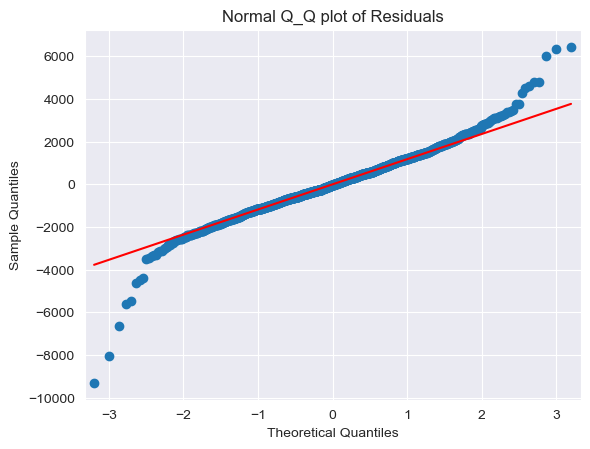

In [129]:
#Test for Normality of Residuals (q_q plot)
import statsmodels.api as sm
q_qplot=sm.qqplot(Model.resid, line='q')
plt.title("Normal Q_Q plot of Residuals")
plt.show()

In [130]:
list(np.where(Model.resid>6000))

[array([109, 146, 522])]

In [131]:
list(np.where(Model.resid<-6000))

[array([220, 600, 959])]

# Residual plot for Homoscedasticity

In [132]:
def get_standerdized_values(values):
    return(values-values.mean())/values.std()

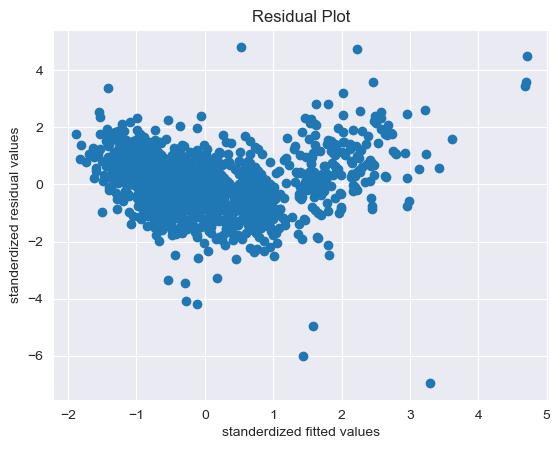

In [133]:
plt.scatter(get_standerdized_values(Model.fittedvalues),get_standerdized_values(Model.resid))

plt.title('Residual Plot')
plt.xlabel("standerdized fitted values")
plt.ylabel("standerdized residual values")
plt.show()

# Residual vs Regressors

eval_env: 1


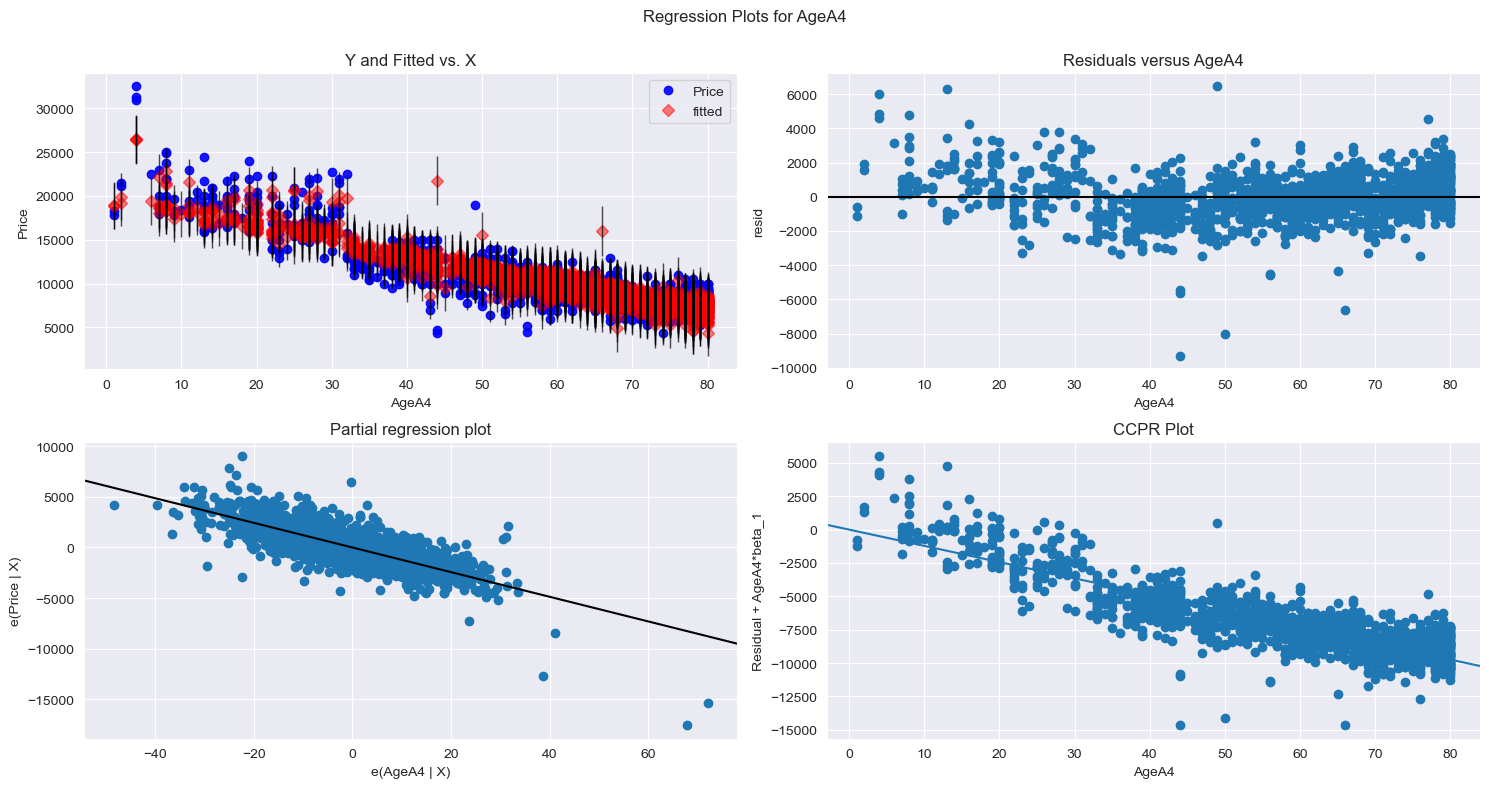

In [134]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(Model, 'AgeA4', fig=fig)
plt.show()

eval_env: 1


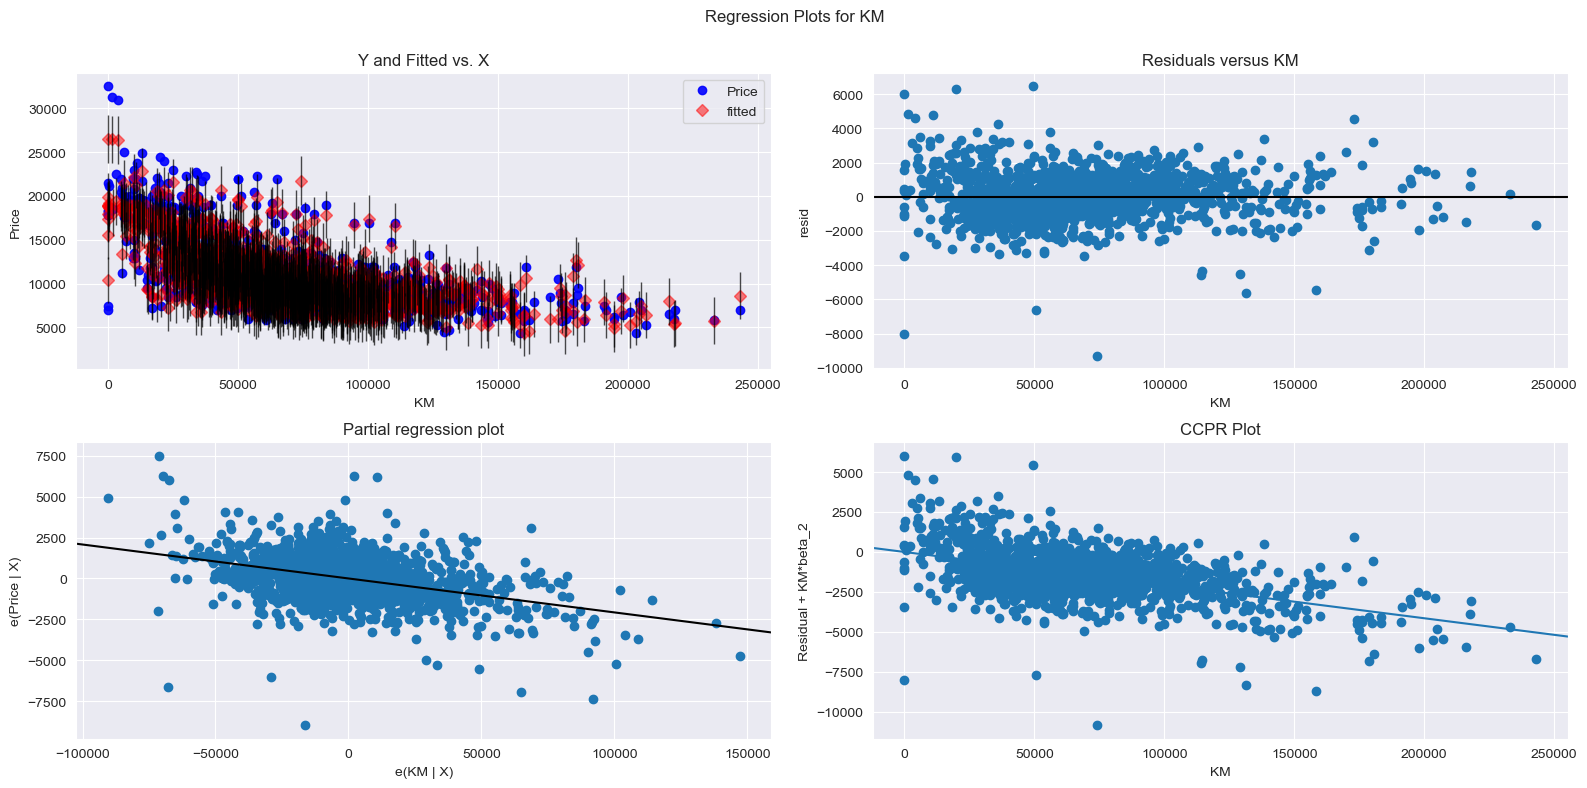

In [135]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'KM', fig=fig)
plt.show()

eval_env: 1


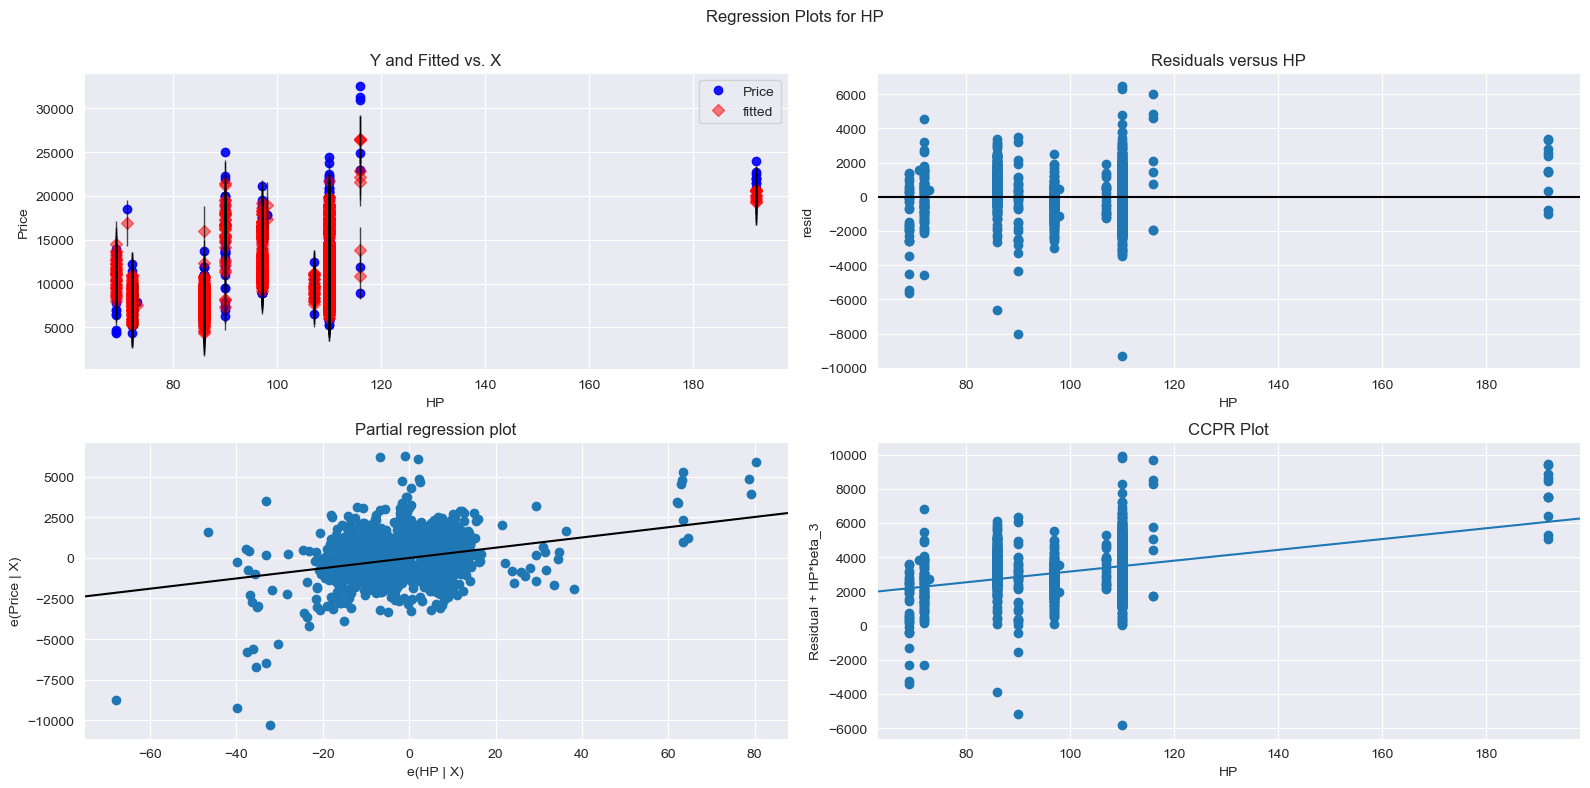

In [136]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'HP', fig=fig)
plt.show()

eval_env: 1


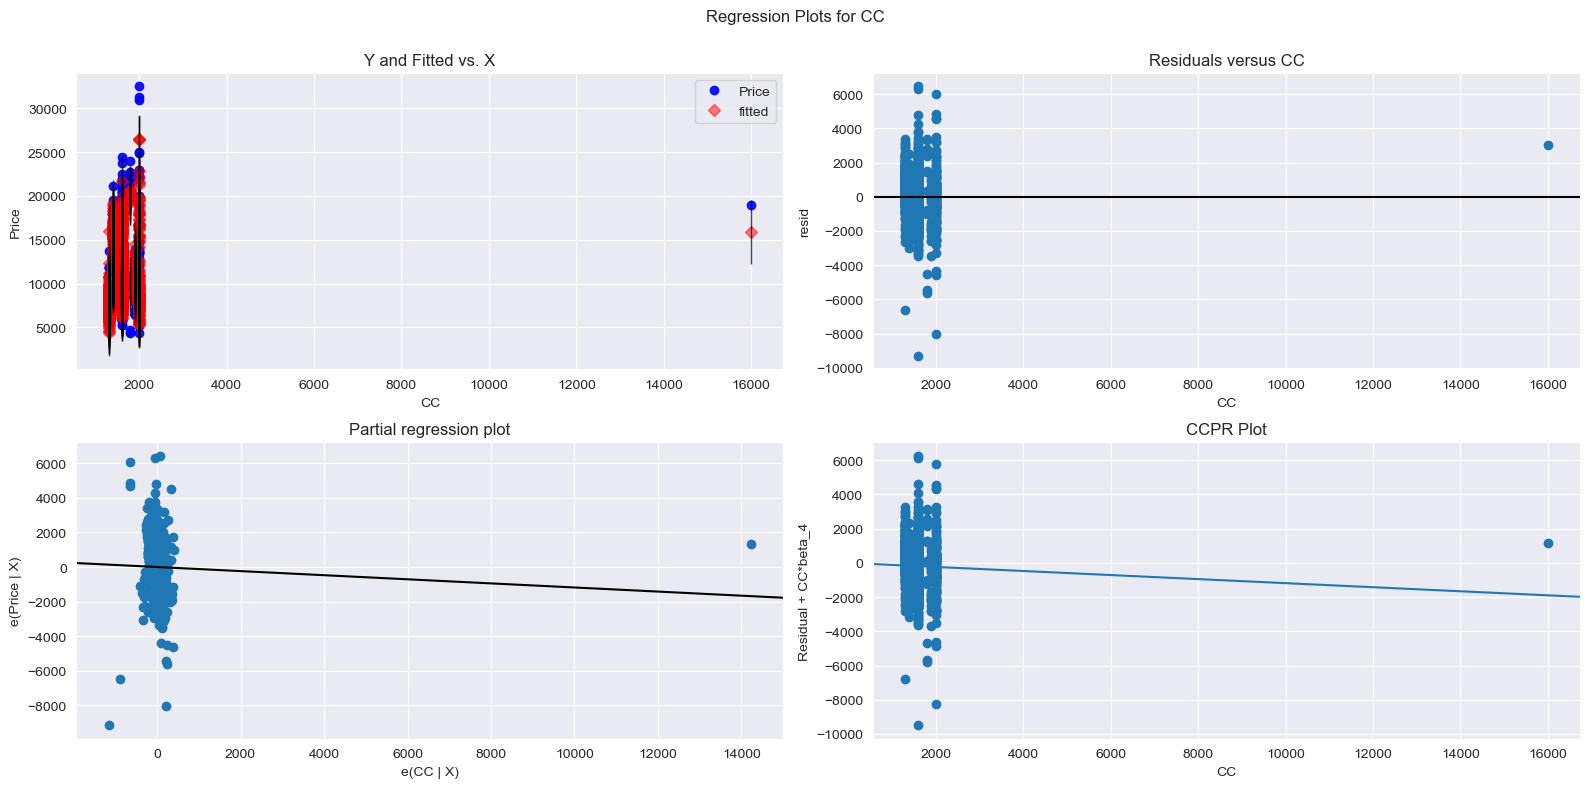

In [137]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'CC', fig=fig)
plt.show()

eval_env: 1


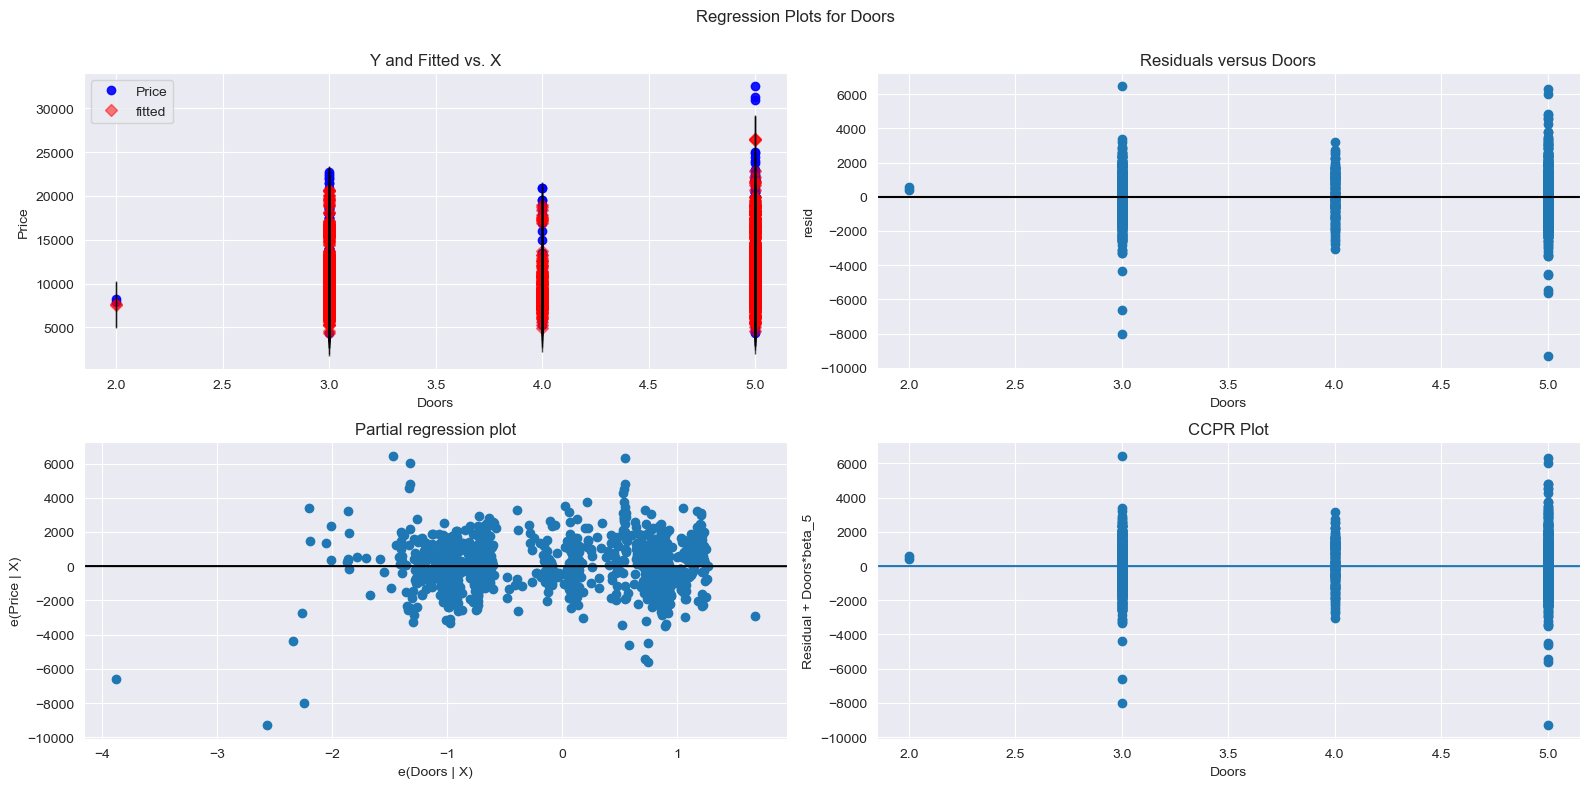

In [138]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'Doors', fig=fig)
plt.show()

eval_env: 1


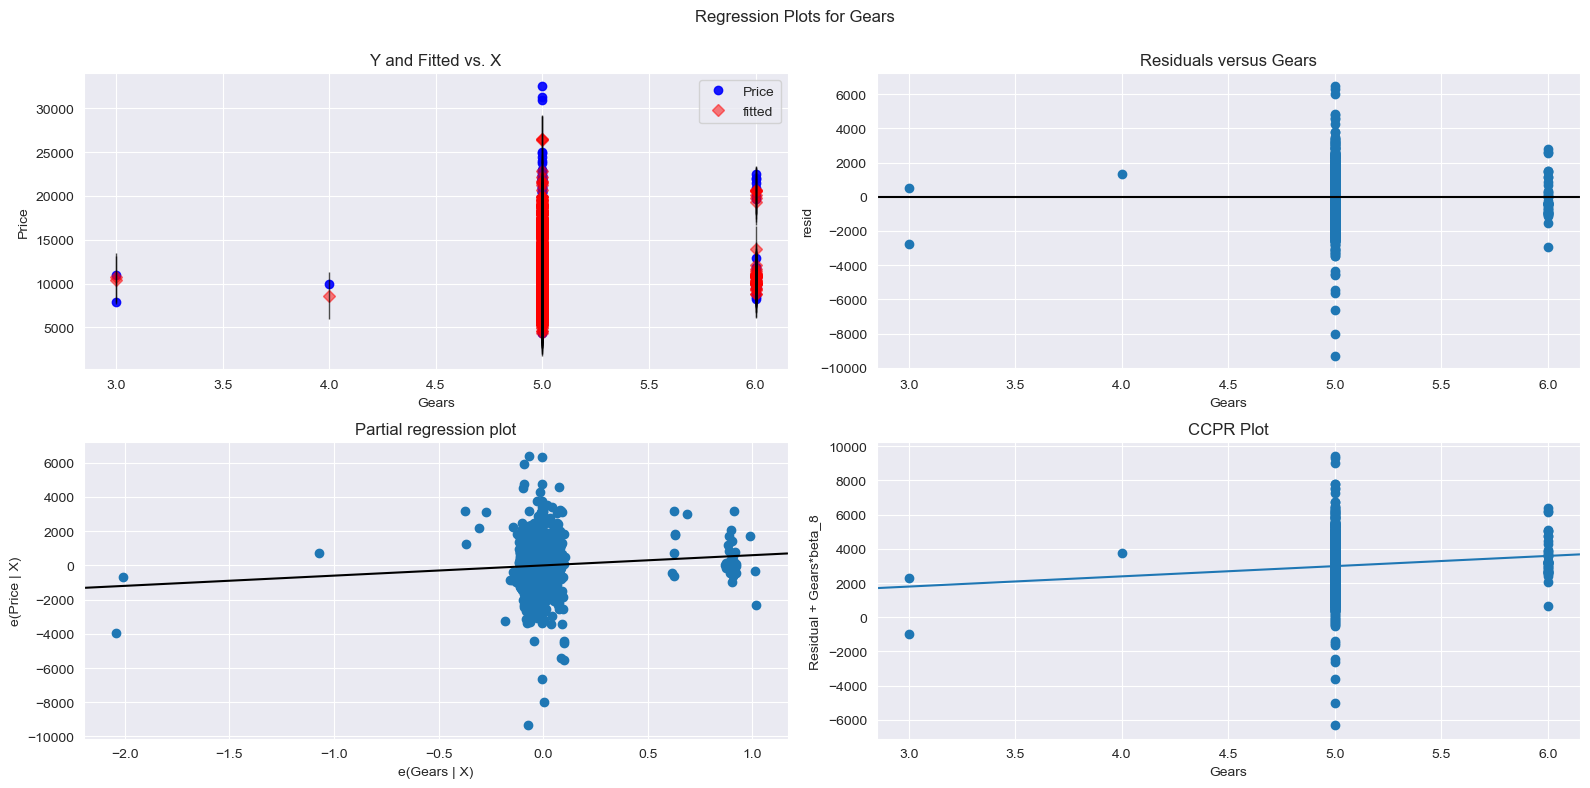

In [139]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'Gears', fig=fig)
plt.show()

eval_env: 1


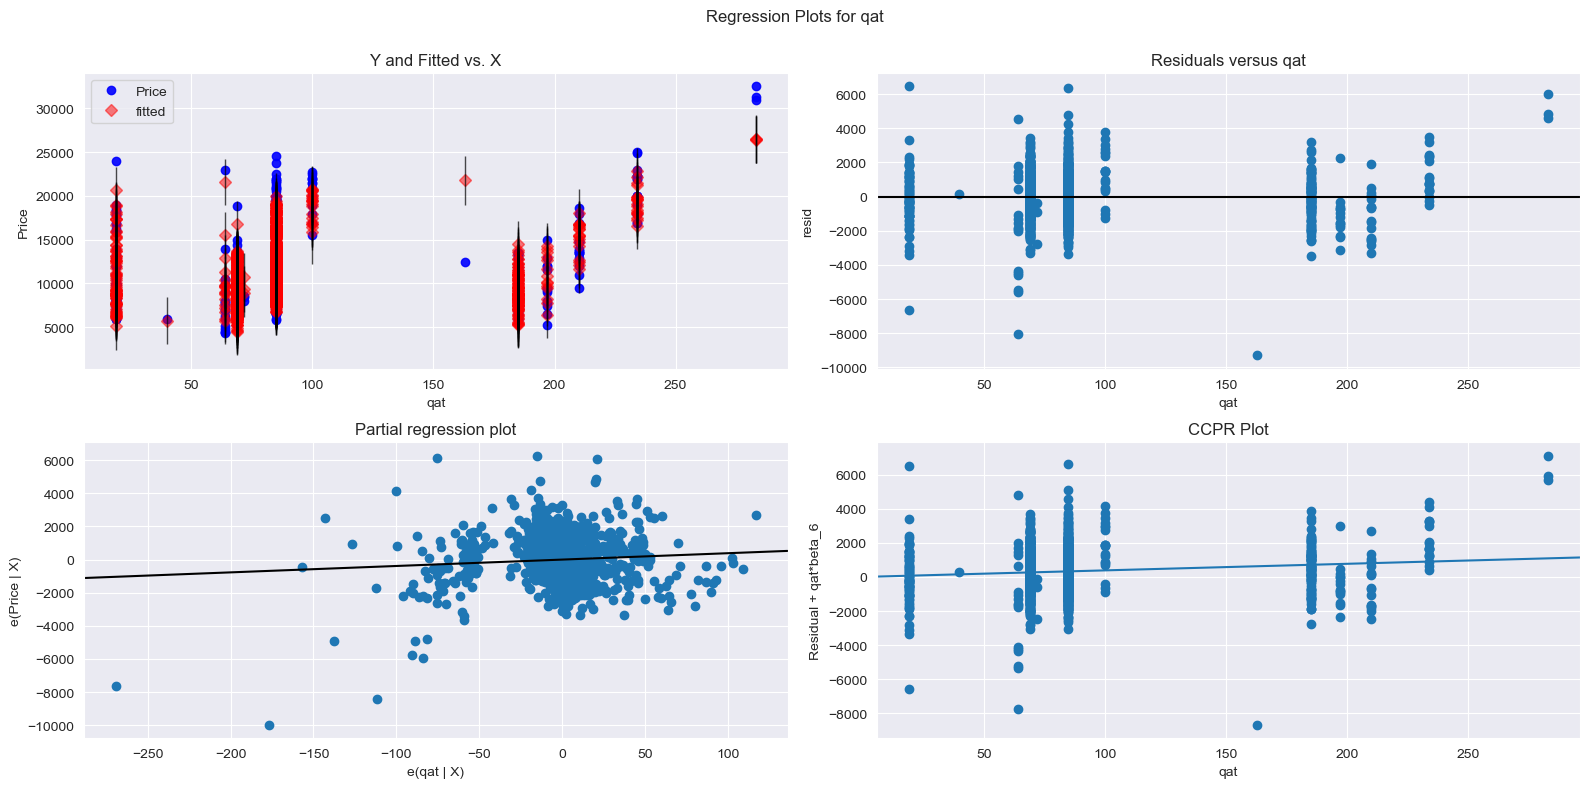

In [140]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'qat', fig=fig)
plt.show()

eval_env: 1


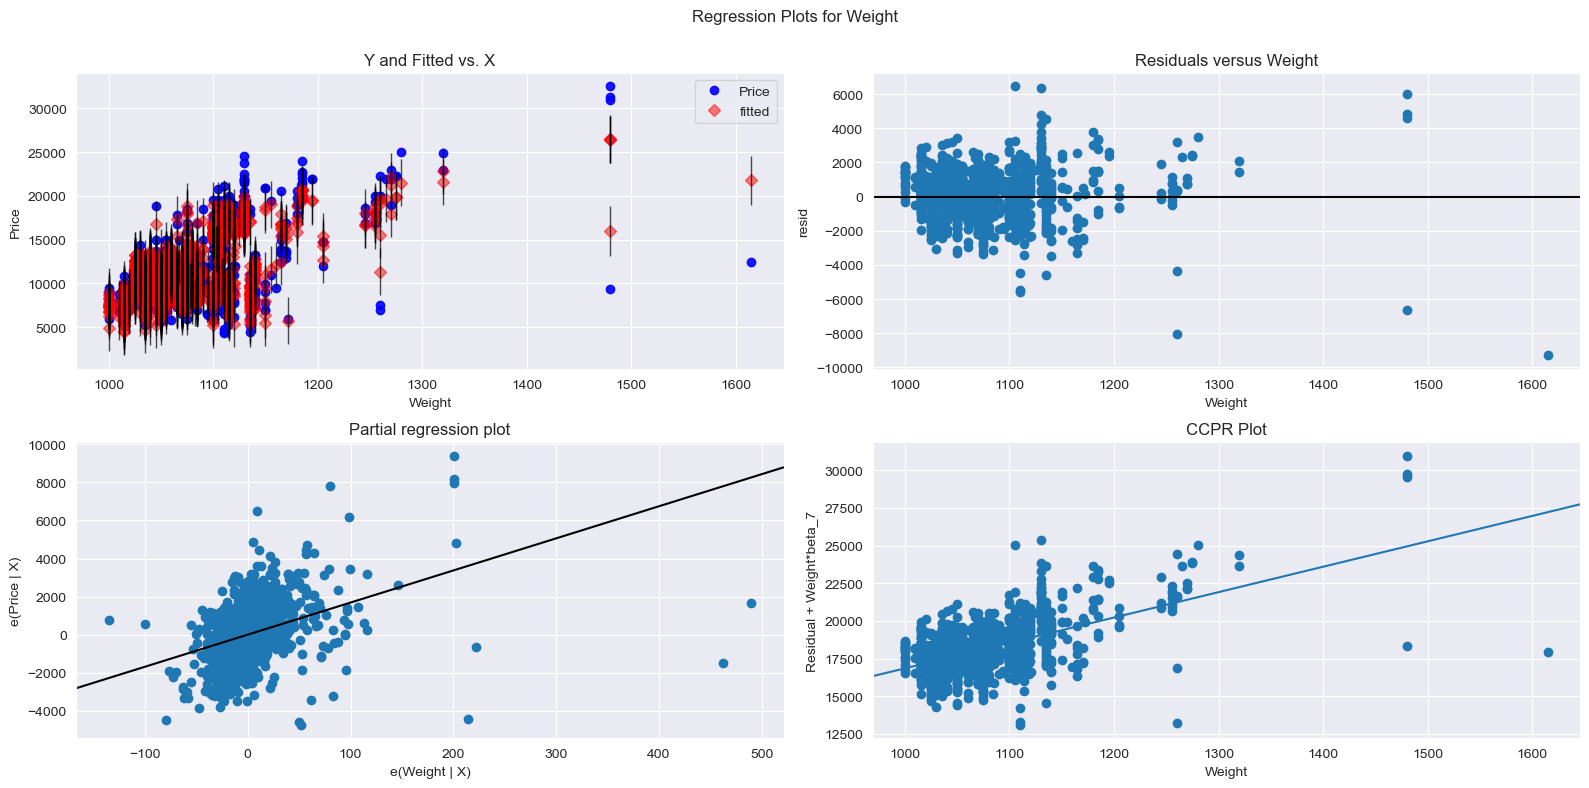

In [141]:
fig = plt.figure(figsize=(16,8))
fig = sm.graphics.plot_regress_exog(Model, 'Weight', fig=fig)
plt.show()

# Model Detection Diagnostics

# 1.Cook's distance

In [142]:
Model_influence =Model.get_influence()
(c, _) = Model_influence.cooks_distance

In [143]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

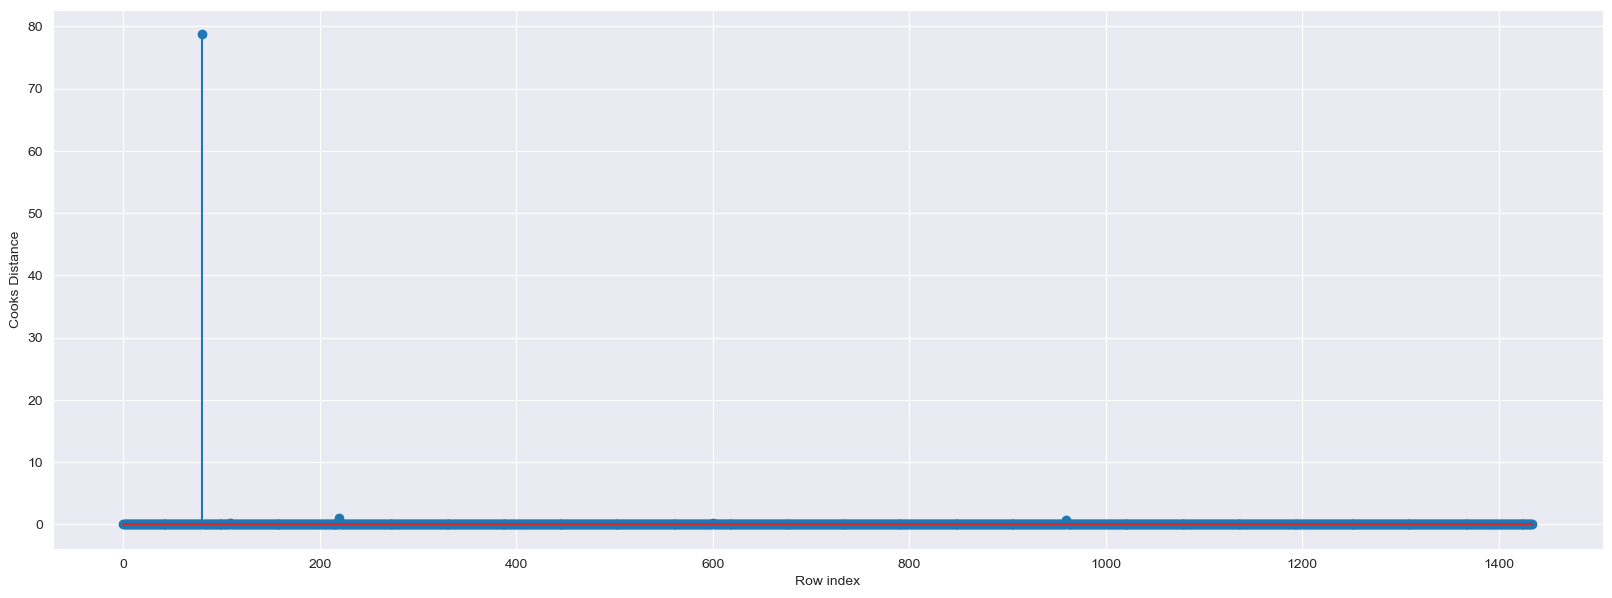

In [144]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(tdata2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [145]:
np.argmax(c), np.max(c)

(80, 78.7295058224769)

# 2.Leverage Value

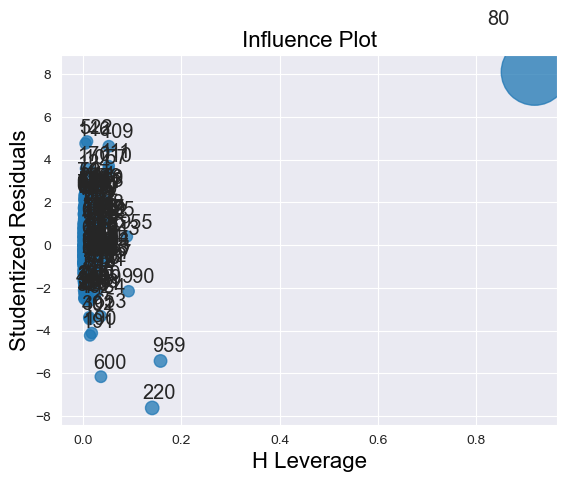

In [146]:
#leverage value using high influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(Model)
plt.show()

In [147]:
k = tdata2.shape[1]
n = tdata2.shape[0]

leverage_cuttoff = (3*(k+1))/n
leverage_cuttoff

0.020905923344947737

In [148]:
tdata2[tdata2.index.isin([80])]

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
80,18950,25,20019,110,16000,5,5,100,1180


# Improving the Model

In [152]:
Kdata = tdata2.drop(tdata2.index[[49]], axis=0).reset_index(drop=True)
Kdata

,Price,AgeA4,KM,HP,CC,Doors,Gears,qat,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [165]:
while Model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        Model=smf.ols('Price~AgeA4+KM+HP+CC+Doors+Gears+qat+Weight',data=Kdata).fit()
        (c,_)=Model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Kdata=Kdata.drop(Kdata.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Kdata
    else:
        final_model=smf.ols('Price~AgeA4+KM+HP+CC+Doors+Gears+qat+Weight',data=Kdata).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.7843554981545067
Thus model accuracy is improved to 0.8285171371354558
Thus model accuracy is improved to 0.8287382073707233
Thus model accuracy is improved to 0.8325118179089459
Thus model accuracy is improved to 0.843743748323045
Thus model accuracy is improved to 0.8688162004132469
Thus model accuracy is improved to 0.8631054804619848
Thus model accuracy is improved to 0.8514760269244532
Thus model accuracy is improved to 0.8525457757887659
Thus model accuracy is improved to 0.8594148309165759
Thus model accuracy is improved to 0.8660234537773716
Thus model accuracy is improved to 0.8639290132613177
Thus model accuracy is improved to 0.8624800030742706
Thus model accuracy is improved to 0.8625202329903869
Thus model accuracy is improved to 0.8664535494539298
Thus model accuracy is improved to 0.8613037725030073
Thus model accuracy is improved to 0.876250563962287
Thus model accuracy is improved to 0.8880172858550957
Thus model accuracy is improve

In [166]:
final_model.rsquared

0.9117007729505148

In [167]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     64.53
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           1.12e-23
Time:                        18:11:16   Log-Likelihood:                -464.47
No. Observations:                  59   AIC:                             946.9
Df Residuals:                      50   BIC:                             965.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.926e+04   6192.029     -7.956      0.000   -6.17e+04   -3.68e+04
AgeA4         97.8808     33.837      2.893      0.006      29.917     165.845
KM            -0.0278      0.007     -3.751      0.000      -0.043      -0.013
HP             9.3017      8.154      1.141      0.259      -7.076      25.679
CC             2.9053      1.189      2.443      0.018       0.517       5.294
Doors        239.6289    110.594      2.167      0.035      17.493     461.764
Gears       -250.4657    605.733     -0.413      0.681   -1467.116     966.185
qat          -44.9594      6.774     -6.637      0.000     -58.566     -31.353
Weight        56.4100      6.092      9.259      0.000      44.174      68.646
==============================================================================
Omnibus:                        1.075   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.968
Skew:                           0.304   Prob(JB):                        0.616
Kurtosis:                       2.843   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""